In [2]:
!pip install plotly datashader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 21.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lecture du Fichier Component Size

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Chemin vers le fichier Parquet
chemin_fichier_parquet = "/content/drive/My Drive/DAC/PLDAC/Data/part-00000-e6d8696c-b587-4027-ab29-734e311a33fe-c000.snappy.parquet"

# Lecture du fichier Parquet et création du DataFrame
try:
    data = pd.read_parquet(chemin_fichier_parquet, engine='pyarrow')
    # Afficher le DataFrame
    print(data.head())
except Exception as e:
    print("Une erreur s'est produite lors de la lecture du fichier Parquet :", e)

   compID  size
0    7044     5
1   16965     5
2   31427     5
3   34321     5
4   35262     5


In [6]:
data.shape

(67957171, 2)

# Création d'un histogramme

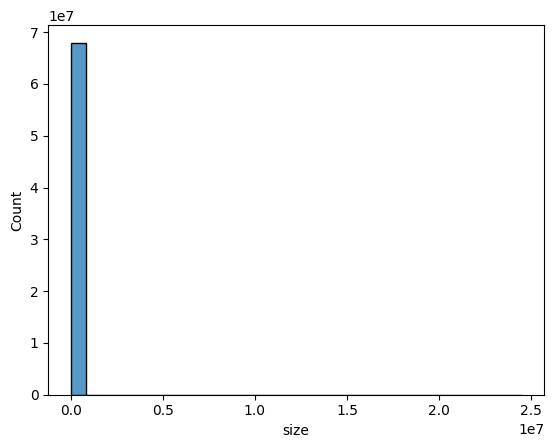

In [8]:
sns.histplot(data['size'], bins=30)
plt.show()

In [10]:
sampled_data = data.sample(n=100000)

sns.histplot(sampled_data['size'], color='skyblue')

plt.title('Distribution des tailles de composants')
plt.xlabel('Taille des composants')
plt.ylabel('Fréquence')

plt.legend(['Taille'])

plt.grid(True)

plt.show()

KeyboardInterrupt: 

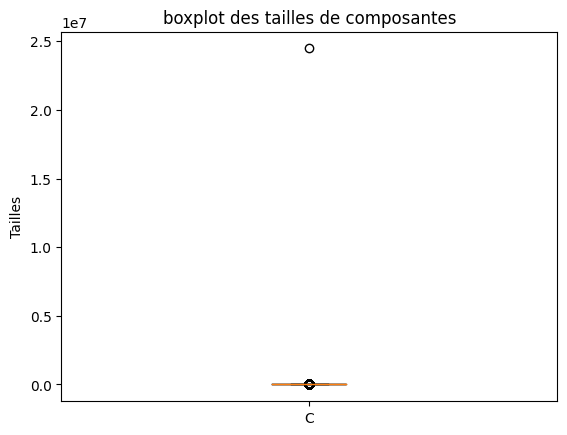

In [13]:
plt.boxplot(data['size'])

plt.title("boxplot des tailles de composantes")

plt.ylabel('Tailles')

plt.gca().xaxis.set_ticklabels(['C'])
plt.show()

In [16]:
unique_values_sorted = data['size'].unique()
unique_values_sorted.sort()
print(len(unique_values_sorted))


1454


In [21]:
frequencies = data['size'].value_counts()
frequencies_dict = frequencies.to_dict()
sorted_frequencies = dict(sorted(frequencies_dict.items()))
sorted_frequencies

{2: 46848540,
 3: 11061956,
 4: 3882564,
 5: 1703466,
 6: 1220311,
 7: 576355,
 8: 433305,
 9: 430156,
 10: 238221,
 11: 190777,
 12: 216852,
 13: 126102,
 14: 109627,
 15: 118404,
 16: 76935,
 17: 67462,
 18: 70440,
 19: 49822,
 20: 44020,
 21: 45157,
 22: 33365,
 23: 29702,
 24: 29730,
 25: 23599,
 26: 21549,
 27: 20787,
 28: 17025,
 29: 15634,
 30: 15115,
 31: 12794,
 32: 12000,
 33: 11271,
 34: 9824,
 35: 9145,
 36: 8662,
 37: 7895,
 38: 7261,
 39: 7061,
 40: 6478,
 41: 5793,
 42: 5621,
 43: 5240,
 44: 4846,
 45: 4582,
 46: 4297,
 47: 4083,
 48: 3954,
 49: 3608,
 50: 3448,
 51: 3287,
 52: 3108,
 53: 2948,
 54: 2771,
 55: 2730,
 56: 2573,
 57: 2385,
 58: 2363,
 59: 2205,
 60: 2073,
 61: 1998,
 62: 1970,
 63: 1971,
 64: 1749,
 65: 1722,
 66: 1675,
 67: 1577,
 68: 1512,
 69: 1539,
 70: 1384,
 71: 1355,
 72: 1285,
 73: 1309,
 74: 1246,
 75: 1153,
 76: 1069,
 77: 1100,
 78: 1033,
 79: 1099,
 80: 969,
 81: 996,
 82: 943,
 83: 908,
 84: 818,
 85: 813,
 86: 784,
 87: 832,
 88: 764,
 89: 72

<ipython-input-33-518015dd5af5>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Size', weights='Frequency', bins=40, kde=False, palette='viridis', element='step', linewidth=2)


<Axes: xlabel='Size', ylabel='Count'>

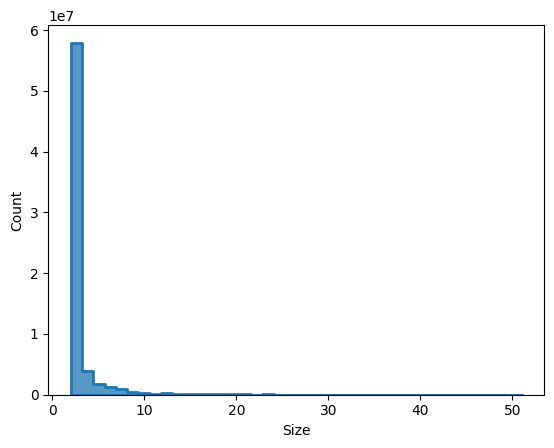

In [33]:
from itertools import islice

top_100 = dict(islice(sorted_frequencies.items(), 50))

# Créer un DataFrame à partir des 100 premiers éléments
df = pd.DataFrame(list(top_100.items()), columns=['Size', 'Frequency'])

# Créer un histogramme avec Seaborn
sns.histplot(data=df, x='Size', weights='Frequency', bins=40, kde=False, palette='viridis', element='step', linewidth=2)
